In [29]:
import pandas as pd
import matplotlib.pyplot as plt

lm_path = f"./language_modeling.csv"
mcp_path = f"./multiple_choice_prompt.csv"
poe_path = f"./process_of_elimination.csv"
lm_df = pd.read_csv(lm_path)
mcp_df = pd.read_csv(mcp_path)
poe_df = pd.read_csv(poe_path)


In [30]:
def process(df):
    # get rid of identical rows 
    df = df.drop_duplicates()
    # df = df[df["checkpoint"].str.startswith("google/flan-t5")]
    # remove the seed column and batch_size column
    df = df.drop(columns=["model_family", "seed", "batch_size"])
    return df
    

In [31]:
lm_df = process(lm_df)
mcp_df = process(mcp_df)
poe_df = process(poe_df)
# concatenate the three dataframes
df = pd.concat([lm_df, mcp_df, poe_df])

In [18]:
pythia_df = df[df['checkpoint'].str.startswith("EleutherAI")]
pythia_df[pythia_df['checkpoint'] == "EleutherAI/pythia-70m-deduped"]
# select rows there method is process of elimination, and data is cqa
pythia_df[(pythia_df["method"] == "process_of_elimination") & (pythia_df["checkpoint"] == "EleutherAI/pythia-70m-deduped")]

,checkpoint,dataset,method,accuracy
12,EleutherAI/pythia-70m-deduped,cqa,process_of_elimination,0.2080
13,EleutherAI/pythia-70m-deduped,copa,process_of_elimination,0.4740
14,EleutherAI/pythia-70m-deduped,obqa,process_of_elimination,0.2420
15,EleutherAI/pythia-70m-deduped,piqa,process_of_elimination,0.4853
16,EleutherAI/pythia-70m-deduped,siqa,process_of_elimination,0.3265
17,EleutherAI/pythia-70m-deduped,winogrande,process_of_elimination,0.5059
36,EleutherAI/pythia-70m-deduped,cqa,process_of_elimination,0.2162
37,EleutherAI/pythia-70m-deduped,copa,process_of_elimination,0.4840
38,EleutherAI/pythia-70m-deduped,obqa,process_of_elimination,0.3140
39,EleutherAI/pythia-70m-deduped,piqa,process_of_elimination,0.4924


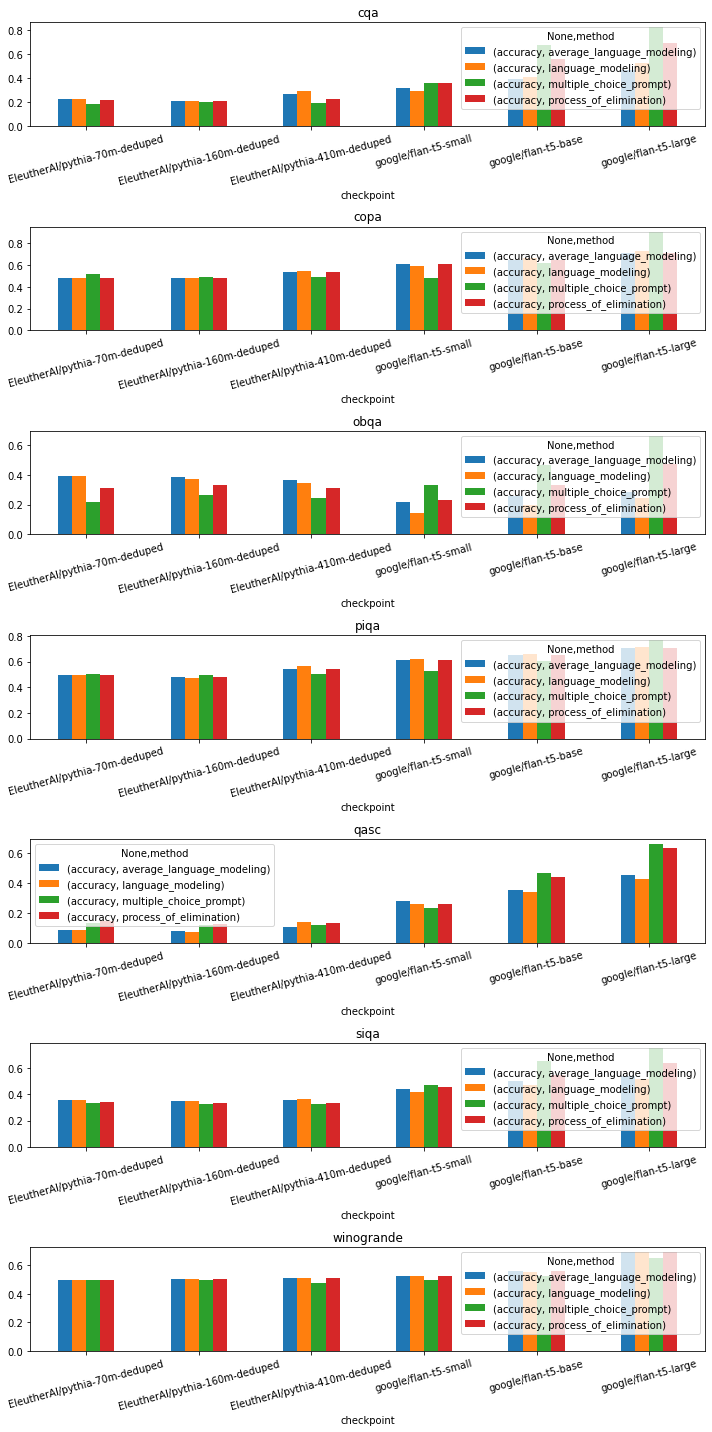

In [54]:
# to do
# 2. (optional) plot confidence interval
# plot the results, grouped by dataset and method, with title and x/y labels
# df_vis.groupby(["dataset", "method"]).mean().unstack().plot(kind="bar", rot=0, figsize=(10, 5))

# checkpoints = ["EleutherAI/pythia-70m-deduped", "EleutherAI/pythia-160m-deduped", "EleutherAI/pythia-410m-deduped", "EleutherAI/pythia-1b-deduped"]
# # creating subplots for four models
# fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# for i, checkpoint in enumerate(checkpoints):
#     df_vis = df[df["checkpoint"] == checkpoint]
#     df_vis.groupby(["dataset", "method"]).mean().unstack().plot(kind="bar", rot=0, ax=axes[i//2][i%2], title=checkpoint)
#     plt.tight_layout()

datasets = ['cqa', 'copa', 'obqa', 'piqa', 'qasc', 'siqa', 'winogrande']
# create subplots for seven datasets
fig, axes = plt.subplots(7, 1, figsize=(10, 20))
for i, dataset in enumerate(datasets):
    df_vis = df[df["dataset"] == dataset]
    model_order = ["EleutherAI/pythia-70m-deduped", "EleutherAI/pythia-160m-deduped", "EleutherAI/pythia-410m-deduped", "google/flan-t5-small", "google/flan-t5-base", "google/flan-t5-large" ]
    df_vis = df_vis.groupby(["checkpoint", "method"]).mean().unstack().reindex(model_order)
    df_vis.plot(kind="bar", rot=15, ax=axes[i], title=dataset)
    plt.tight_layout()


In [48]:
df_vis.reindex(model_order)

accuracy                    \
method                         average_language_modeling language_modeling   
checkpoint                                                                   
EleutherAI/pythia-70m-deduped                     0.4988            0.4988   
EleutherAI/pythia-160m-deduped                    0.5059            0.5059   
EleutherAI/pythia-410m-deduped                    0.5091            0.5091   
google/flan-t5-small                              0.5249            0.5225   
google/flan-t5-base                               0.5556            0.5493   
google/flan-t5-large                              0.6882            0.6890   

                                                                              
method                         multiple_choice_prompt process_of_elimination  
checkpoint                                                                    
EleutherAI/pythia-70m-deduped                  0.4980                 0.4988  
EleutherAI/pythia-160m-deduped                 0.4964                 0.5059  
EleutherAI/pythia-410m-deduped                 0.4736                 0.5091  
google/flan-t5-small                           0.4980                 0.5249  
google/flan-t5-base                            0.5225                 0.5556  
google/flan-t5-large                           0.6496                 0.6882